In [2]:
from psychophysicsUtils import * 
%load_ext autoreload
%autoreload 2

In [22]:
names = [
         #'molly',
         'simon',
         'niko',
         'rodrigo',
         'ricky',
         'sian',
         #'clem',
         #'tadej',
         #'tomtest',
         #'nici',
         #'nicole',
         #'lillianne',
         #'dammy',
         #'shanice',
         #'morio',
         #'chris',
        ]




 
 
simon
Loading and synchronising pupillometry data (EyeLink): 

  0%|          | 0/2421978 [00:00<?, ?it/s]

0 errors in total
Uniformly sampling  data to 2000Hz (current frequency ~1000Hz)
Removing speed outliers (12.84%) and size lowliers/zero (10.52%)  (additional 14.36% removed vs raw)
Interpolating missing values: 16.59% of values are now interpolated
Data: 8.13%  missing, 22.46% outliers, 16.59% interpolated
Lowpass filtering out frequencies above 4.00 +- 0.50Hz
Highpass filtering out frequencies below 0.10 +- 0.01Hz
z scoring

 
 
niko
Loading and synchronising pupillometry data (EyeLink): 

  0%|          | 0/3149900 [00:00<?, ?it/s]

0 errors in total
Uniformly sampling  data to 2000Hz (current frequency ~1000Hz)
Removing speed outliers (18.82%) and size lowliers/zero (9.58%)  (additional 18.78% removed vs raw)
Interpolating missing values: 15.54% of values are now interpolated
Data: 9.55%  missing, 28.29% outliers, 15.54% interpolated
Lowpass filtering out frequencies above 4.00 +- 0.50Hz
Highpass filtering out frequencies below 0.10 +- 0.01Hz
z scoring

 
 
rodrigo
Loading and synchronising pupillometry data (EyeLink): 

  0%|          | 0/2639823 [00:00<?, ?it/s]

0 errors in total
Uniformly sampling  data to 2000Hz (current frequency ~1000Hz)
Removing speed outliers (16.54%) and size lowliers/zero (5.69%)  (additional 16.54% removed vs raw)
Interpolating missing values: 13.04% of values are now interpolated
Data: 5.47%  missing, 21.98% outliers, 13.04% interpolated
Lowpass filtering out frequencies above 4.00 +- 0.50Hz
Highpass filtering out frequencies below 0.10 +- 0.01Hz
z scoring

 
 
ricky
Loading and synchronising pupillometry data (EyeLink): 

  0%|          | 0/3531854 [00:00<?, ?it/s]

0 errors in total
Uniformly sampling  data to 2000Hz (current frequency ~1000Hz)
Removing speed outliers (16.68%) and size lowliers/zero (5.07%)  (additional 16.68% removed vs raw)
Interpolating missing values: 9.37% of values are now interpolated
Data: 4.58%  missing, 21.24% outliers, 9.37% interpolated
Lowpass filtering out frequencies above 4.00 +- 0.50Hz
Highpass filtering out frequencies below 0.10 +- 0.01Hz
z scoring

 
 
sian
Loading and synchronising pupillometry data (EyeLink): 

  0%|          | 0/3118388 [00:00<?, ?it/s]

0 errors in total
Uniformly sampling  data to 2000Hz (current frequency ~1000Hz)
Removing speed outliers (12.56%) and size lowliers/zero (11.60%)  (additional 13.65% removed vs raw)
Interpolating missing values: 18.23% of values are now interpolated
Data: 9.79%  missing, 23.31% outliers, 18.23% interpolated
Lowpass filtering out frequencies above 4.00 +- 0.50Hz
Highpass filtering out frequencies below 0.10 +- 0.01Hz
z scoring


<Figure size 2400x1650 with 0 Axes>

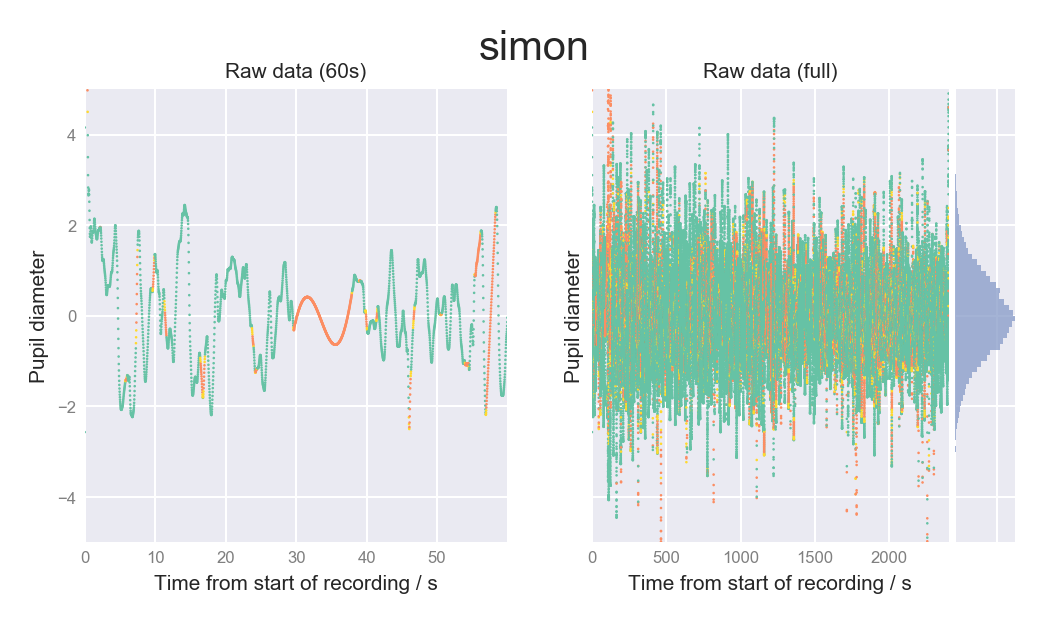

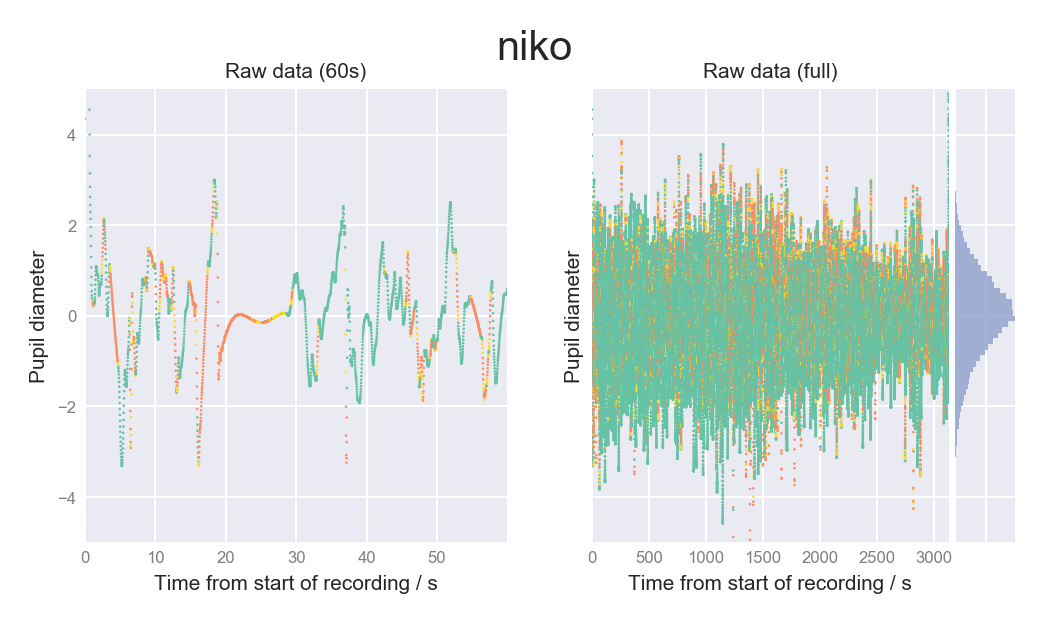

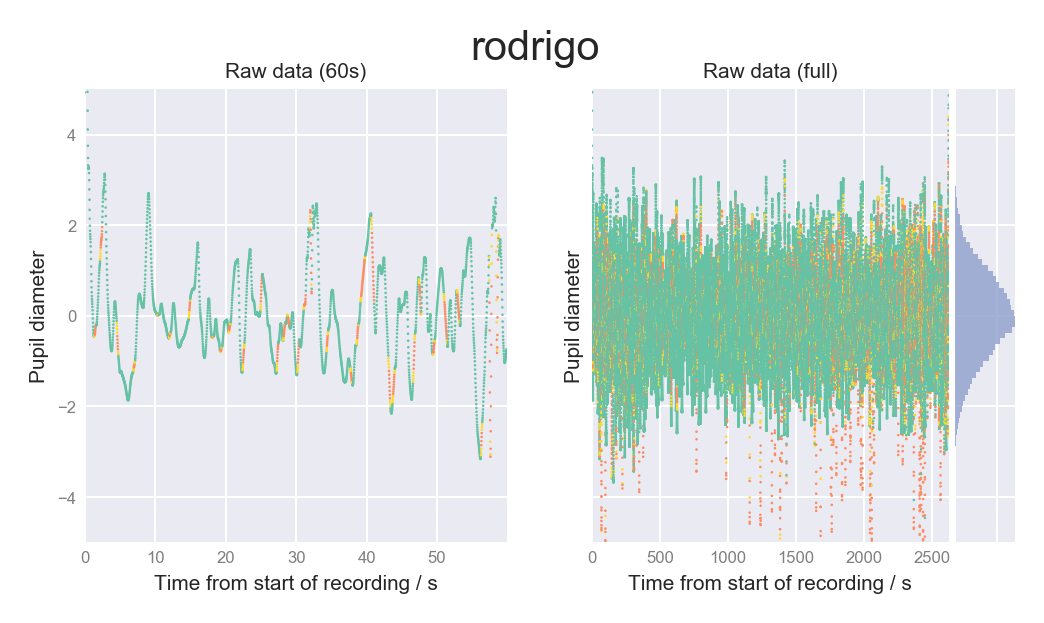

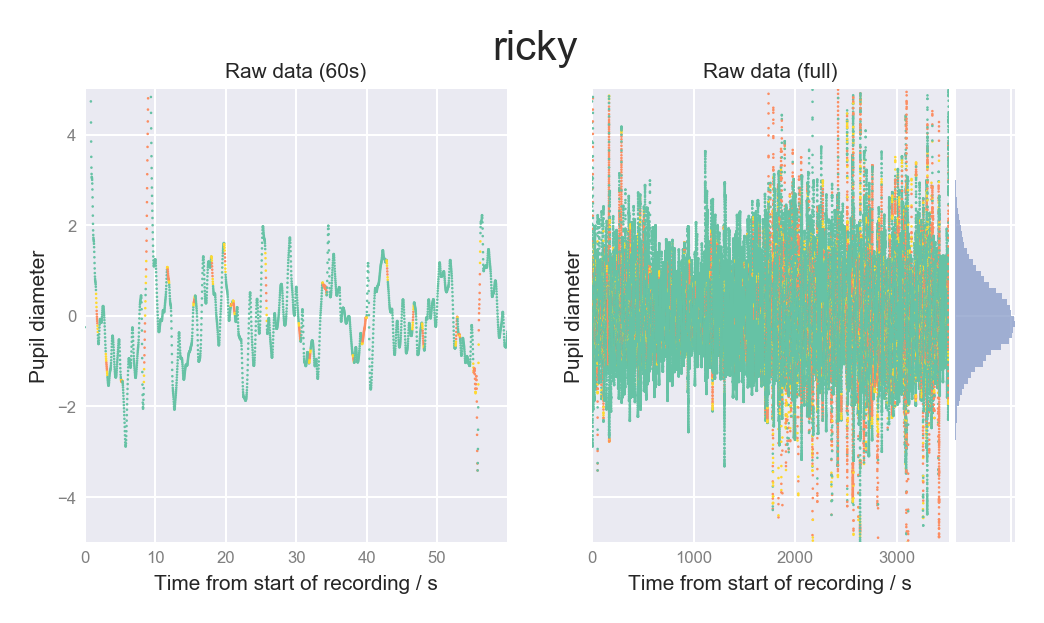

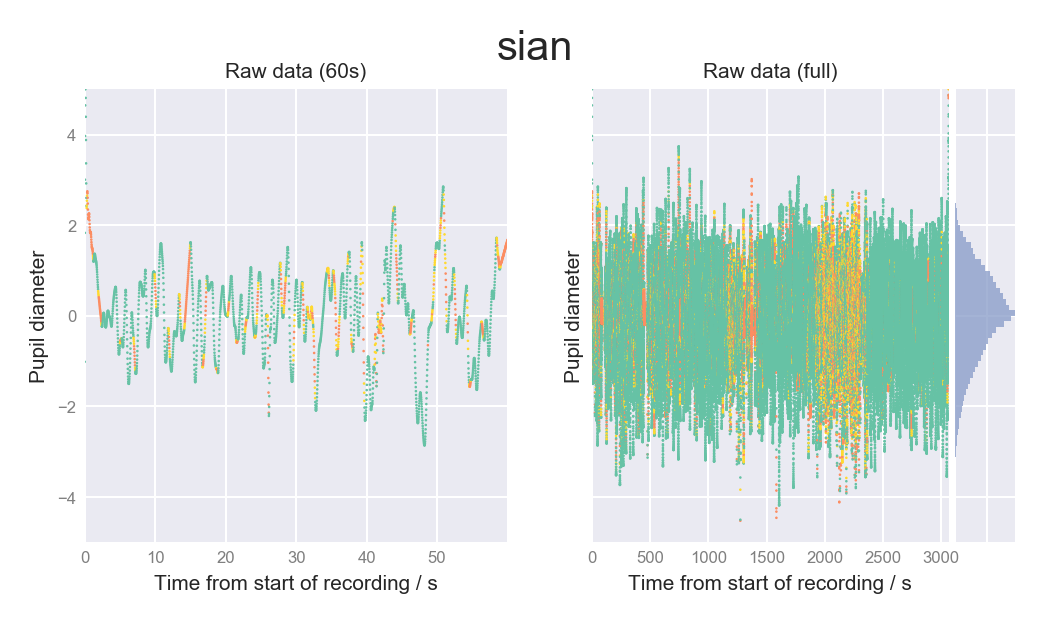

In [23]:
data = {}
for name in names:
    data[name] = {}
    print('\n \n \n'+name,)
    data[name] = pupilDataClass(name)
    data[name].loadData(defaultMachine='EL',eye='right')
    data[name].uniformSample()
    data[name].removeOutliers(n_speed=3,n_size=3)
    data[name].downSample()
    data[name].interpolate(gapExtension=0.1)
    data[name].frequencyFilter(lowF=0.1, lowFwidth=0.01, highF=4, highFwidth=0.5)
    data[name].zScore()
    data[name].plot(title=name, zoomRange = [0,60], saveName = None, hist=True, ymin='-ymax', ymax=5)

In [24]:
for name in names:
    data[name].loadAndProcessTrialData()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/simon_trial.csv'

In [42]:
print('Example:')
exampleTrial = 21
print('White cross appears: %.3f' %data[names[0]].trialData[exampleTrial]['whiteCrossAppears'])
print('White noise starts:  %.3f' %data[names[0]].trialData[exampleTrial]['whiteNoiseStart'])
print('Tone starts:         %.3f' %data[names[0]].trialData[exampleTrial]['toneStart'])
print('Gap starts:          %.3f' %data[names[0]].trialData[exampleTrial]['gapStart'])
print('Tone after gap?:     %r' %data[names[0]].trialData[exampleTrial]['toneAfterGap'])
print('Tone heard?:         %r' %data[names[0]].trialData[exampleTrial]['toneHeard'])

Example:
White cross appears: 298.953
White noise starts:  302.256
Tone starts:         303.765
Gap starts:          306.256
Tone after gap?:     False
Tone heard?:         True


In [44]:
names = [
         #'molly',
         #'simon',
         #'niko',
         #'rodrigo',
         #'ricky',
         #'sian',
         #'clem',
         #'tadej',
         'tomtest',
         #'nici',
         #'nicole',
         #'lillianne',
         #'marta',
         #'dammy',
         #'shanice',
         #'morio',
         #'chris',
        ]
name = 'all'
whoToPlot = plotNames
plotData = {}
for person in whoToPlot:
    plotData[person] = data[person]



## Reaction time change over time 

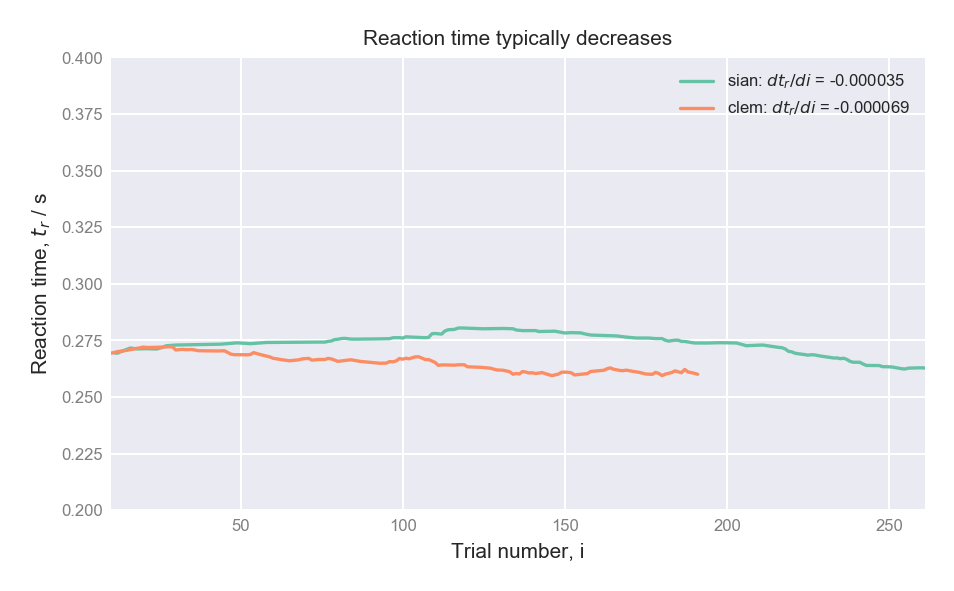

In [45]:
fig, ax = plt.subplots(figsize=(3.5,2))

max_ = 0
for (i,name_) in enumerate(plotNames):
    trialIndex = []
    reactionTime = []
    for j in range(len(data[name_].trialData)):
        if (j > 3
            and data[name_].trialData[j]['trialCorrect'] == 'correct' 
           ):
            trialIndex.append(j)
            reactionTime.append(data[name_].trialData[j]['reactionTime'])

    smoothedReactionTime = []
    smoothedReactionTimeStd = []
    for j in range(len(reactionTime)):
        a = reactionTime[max(0,j-30):min(len(reactionTime),j+30)]
        smoothedReactionTime.append(np.mean(a))
        smoothedReactionTimeCi95 = 1.96*np.std(a)/np.sqrt(len(a))
    slope = stats.linregress(trialIndex,smoothedReactionTime)[0]
    ax.plot(trialIndex,smoothedReactionTime,alpha=1,c='C'+str(i),linewidth=0.8,label=r"%s: $dt_{r}/di$ = %.6f" %(name_,slope))
    #ax.plot(trialIndex,reactionTime,alpha=0.4,c='C'+str(i),linewidth=0.15)
    #ax.fill_between(trialIndex,smoothedReactionTime+smoothedReactionTimeCi95,smoothedReactionTime-smoothedReactionTimeCi95,alpha=0.2,color='C'+str(i))
    max_ = max(max_,np.max(reactionTime))
ax.set_ylim([0.2,0.4])
ax.set_xlabel('Trial number, i')
ax.set_ylabel(r'Reaction time, $t_{r}$ / s') 
ax.set_title('Reaction time typically decreases')
ax.legend()
plt.savefig('./figures/'+name+'_reactiontime.png',tightlayout=True, transparent=False,dpi=500)

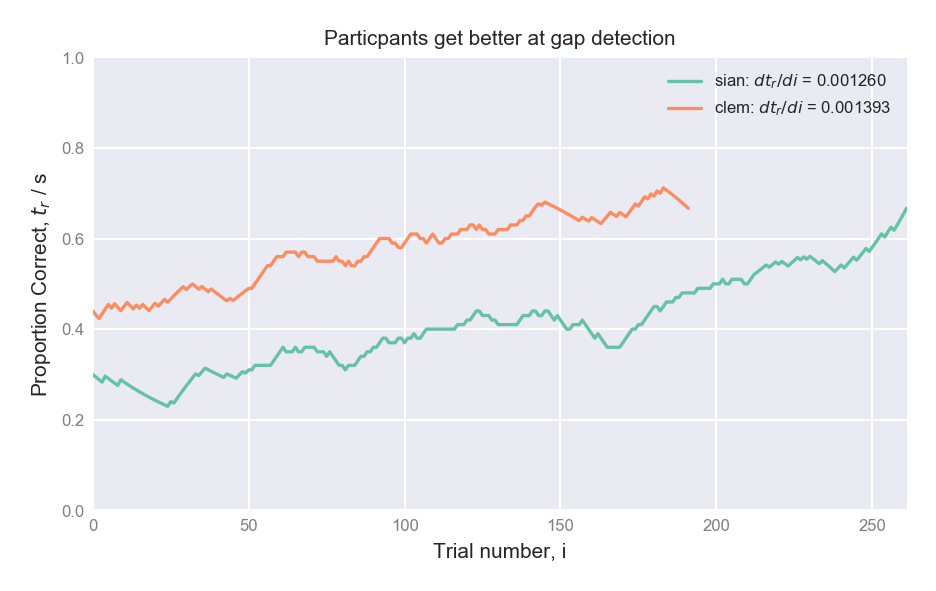

In [46]:
fig, ax = plt.subplots(figsize=(3.5,2))

max_ = 0
for (i,name_) in enumerate(plotNames):
    trialIndex = []
    errorRate = []
    for j in range(len(data[name_].trialData)):
        trialIndex.append(j)
        errorRate.append(int(data[name_].trialData[j]['trialCorrect'] == 'correct'))

    smoothedErrorRate = []
    smoothedErrorRate = []
    for j in range(len(errorRate)):
        a = errorRate[max(0,j-50):min(len(errorRate),j+50)]
        smoothedErrorRate.append(np.mean(a))
        smoothedErrorRateCi95 = 1.96*np.std(a)/np.sqrt(len(a))
    slope = stats.linregress(trialIndex,smoothedErrorRate)[0]
    ax.plot(trialIndex,smoothedErrorRate,alpha=1,c='C'+str(i),linewidth=0.8,label=r"%s: $dt_{r}/di$ = %.6f" %(name_,slope))
    #ax.plot(trialIndex,errorRate,alpha=0.4,c='C'+str(i),linewidth=0.15)
    #ax.fill_between(trialIndex,smoothedErrorRate+smoothedErrorRateCi95,smoothedErrorRate-smoothedErrorRateCi95,alpha=0.2,color='C'+str(i))
    max_ = max(max_,np.max(errorRate))
ax.set_ylim([0,1])
ax.set_xlabel('Trial number, i')
ax.set_ylabel(r'Proportion Correct, $t_{r}$ / s') 
ax.set_title('Particpants get better at gap detection')
ax.legend()
plt.savefig('./figures/'+name+'_errorRate.png',tightlayout=True, transparent=False,dpi=500)

## Pupil responses aligned to trial events


sian: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range


(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa089847b00>)

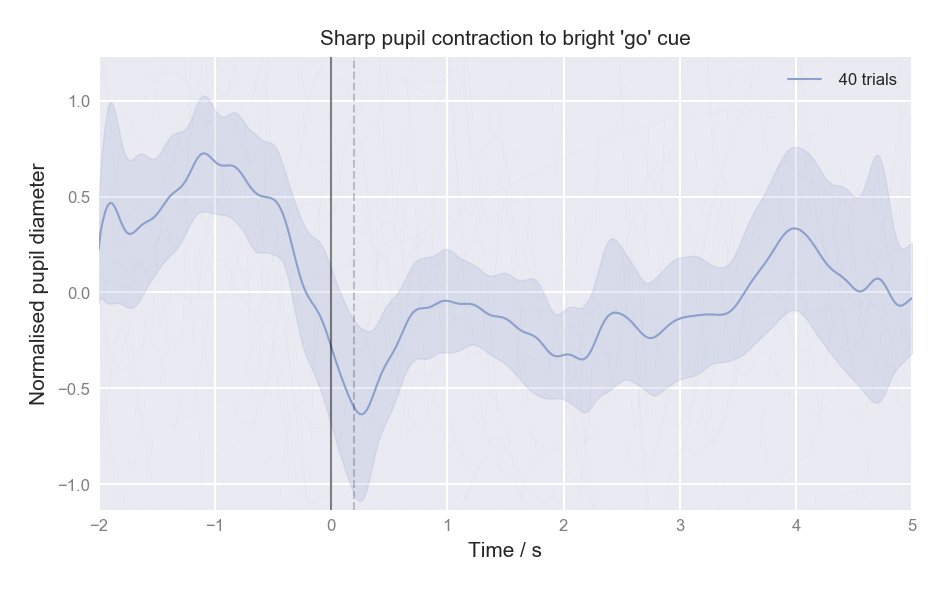

In [47]:
plotAlignedPupilDiams(plotData,
                      alignEvent='whiteCrossAppears',
                      title="Sharp pupil contraction to bright 'go' cue",
                      dd={'':{'color':'C2','conditions':[0,13],'range':('all'),'plotTrials':True}},
                      saveTitle = name+"_gocue")


sian: 212 valid trials of which 212 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 142 valid trials of which 67 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      75 excluded due to no pupildata in this time range


(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0a9fad7b8>)

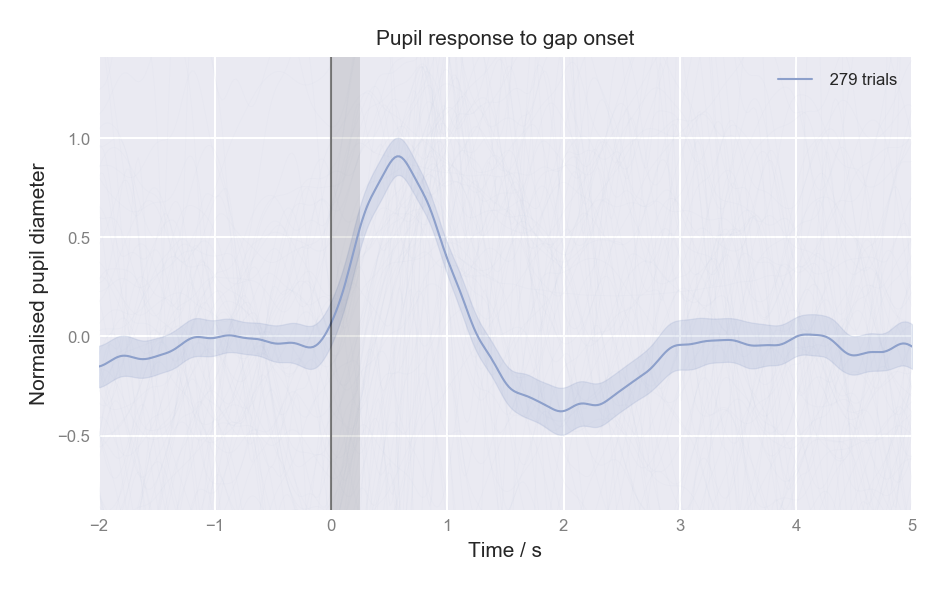

In [48]:
plotAlignedPupilDiams(plotData,
                      alignEvent='gapStart',
                      title="Pupil response to gap onset",
                      saveTitle = name+"_gap",
                      dd={'':{'color':'C2','conditions':[2,13],'range':('all'),'plotTrials':True}})


sian: 212 valid trials of which 212 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 142 valid trials of which 67 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      75 excluded due to no pupildata in this time range


(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0b9f0a1d0>)

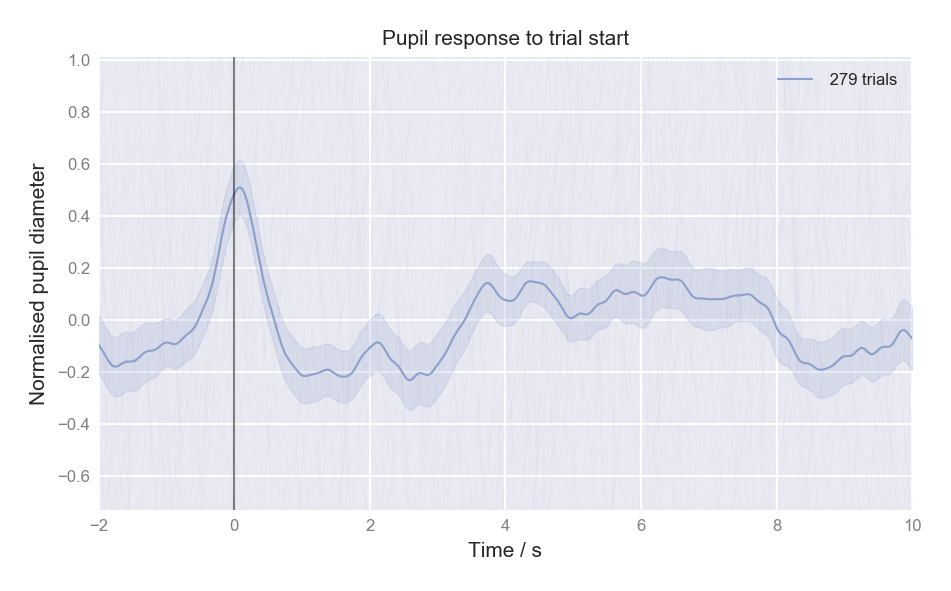

In [49]:
plotAlignedPupilDiams(plotData,
                      alignEvent='trialStart',
                      title="Pupil response to trial start",
                      saveTitle = name+"_trialstart",
                      tend=10,
                      dd={
                          '':{'color':'C2','conditions':[2,13],'range':('all'),'plotTrials':True},
                      })

Normal
sian: 119 valid trials of which 119 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
Violation
sian: 47 valid trials of which 46 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      0 excluded due to no pupildata in this time range
SIGNIFICANCE TESTING BETWEEN 0.62 AND 3.62s:
Normal vs Violation: 0.8320
(-3.4098834534982414, 2.773325986570542)
Normal
clem: 88 valid trials of which 40 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      47 excluded due to no pupildata in this time range
Violation
clem: 24 valid trials of which 12 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      12 excluded due to no pupildata in this time range
SIGNIFICANCE TESTING BETWEEN 0.62 AND 3.62s:
Normal vs Violation: 1.0000
(-2.533633665048824, 1.893232638149157)


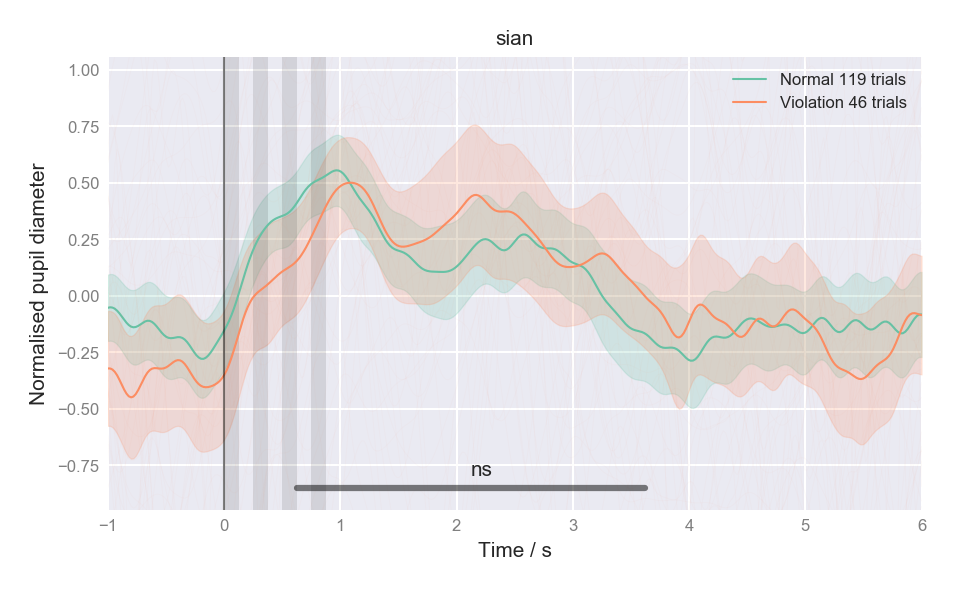

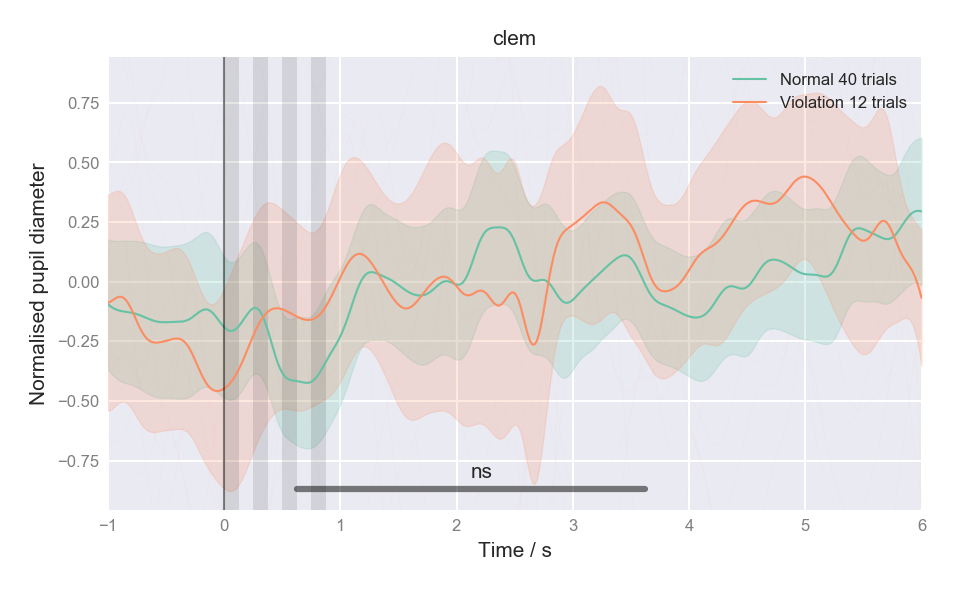

In [51]:
for name_ in plotNames:
    plotData_ = {}
    plotData_[name_] = data[name_]
    plotAlignedPupilDiams(plotData_, 
                          alignEvent='toneStart',
                          title=name_,
                          saveTitle = name_+"_tone",
                          dd={
                              'Normal':        {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                              'Violation':     {'color':'C1','conditions':[2,5,10,11,13],'range':('all'),'plotTrials':True},
                             },
                          testRange=[0.625,3.625],
                          tstart=-1,
                          tend=6
                         )

Normal
sian: 119 valid trials of which 119 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 88 valid trials of which 40 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      47 excluded due to no pupildata in this time range
Violation
sian: 47 valid trials of which 46 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 24 valid trials of which 12 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      12 excluded due to no pupildata in this time range
SIGNIFICANCE TESTING BETWEEN 0.62 AND 3.62s:
Normal vs Violation: 0.8520
(-0.5728900702183186, 0.6105454079236494)


(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0d47b9a90>)

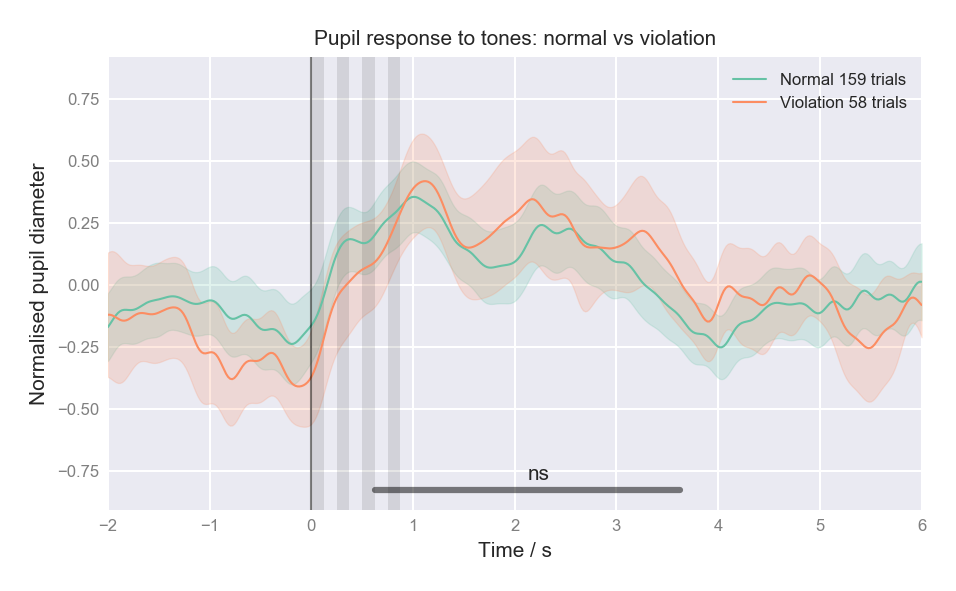

In [52]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: normal vs violation",
                      saveTitle = name+"_tone",
                      dd={
                          'Normal':     {'color':'C0','conditions':[2,4,10,11],'range':('all'),'plotTrials':False},
                          'Violation':  {'color':'C1','conditions':[2,5,10,11],'range':('all'),'plotTrials':False},

                         },
                      testRange=[0.625,3.625],
                      tstart=-2,
                      tend=6
                     )


Normal
sian: 119 valid trials of which 119 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 88 valid trials of which 40 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      47 excluded due to no pupildata in this time range
Violation, abc_
sian: 18 valid trials of which 18 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 7 valid trials of which 2 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      5 excluded due to no pupildata in this time range
Violation, ab_d
sian: 16 valid trials of which 15 remain after: 
      0 excluded due to interpolation 
      1 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 6 valid trials of which 4 remain after:

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0722e7780>)

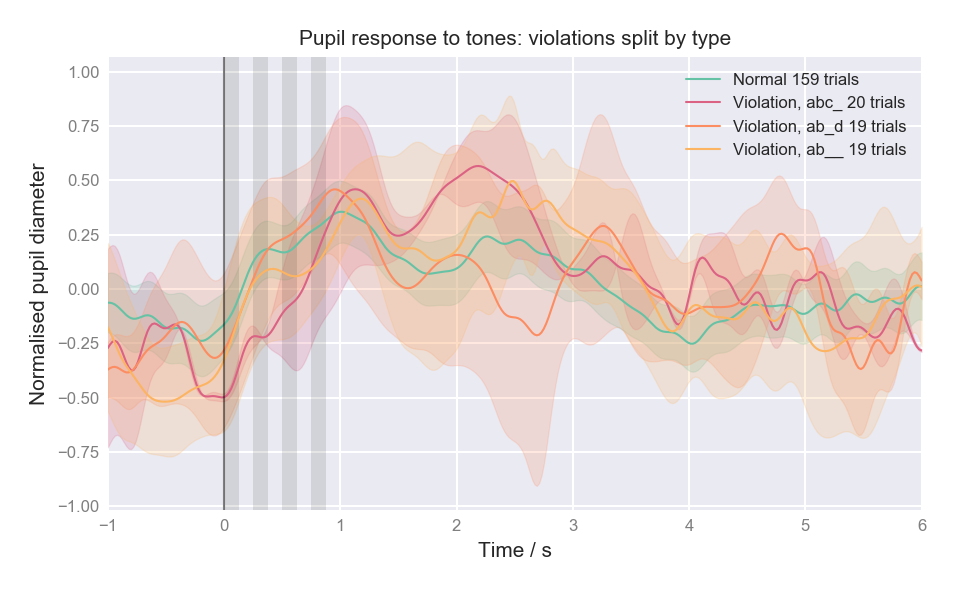

In [53]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: violations split by type",
                      saveTitle = name+"_tonesplit",
                      dd={
                          'Normal':        {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                          #'Violation':     {'color':'C1','conditions':[2,5,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, abc_':     {'color':'#dc6284','conditions':[2,6,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, ab_d':     {'color':'C1','conditions':[2,7,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, ab__':     {'color':'#fcb462','conditions':[2,8,10,11,13],'range':('all'),'plotTrials':False},
                         },
                      testRange=[0.625,3.625],
                      tstart=-1,
                      tend=6
                     )

Normal last
sian: 139 valid trials of which 139 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 114 valid trials of which 67 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      47 excluded due to no pupildata in this time range
Volation first
sian: 47 valid trials of which 47 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 24 valid trials of which 12 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      12 excluded due to no pupildata in this time range
Violation last
sian: 47 valid trials of which 47 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 24 valid trials of which 12 rema

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0b9efbac8>)

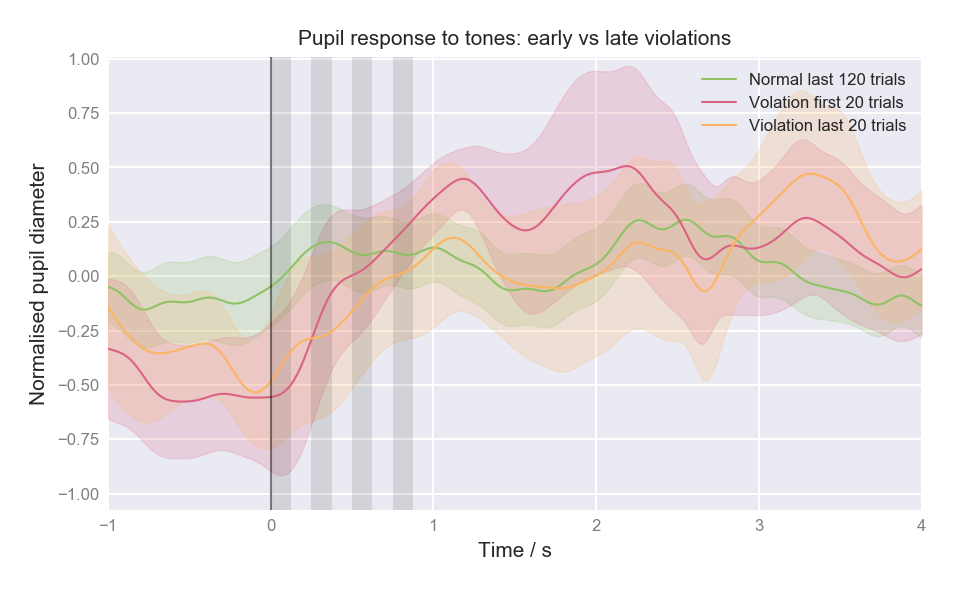

In [54]:
plotAlignedPupilDiams(plotData,
                      alignEvent='toneStart',
                      title="Pupil response to tones: early vs late violations",
                      saveTitle=name+"earlylate",
                      tstart=-1,tend=4,
                      dd={
                          #'Normal first':        {'color':'#3ec2e6','conditions':[1,4,10,11,13],'range':('first',60),'plotTrials':False},
                          #'Normal middle':       {'color':'C0','conditions':[0,3,5],'range':('mid',60),'plotTrials':False},
                          'Normal last':         {'color':'#8ec264','conditions':[1,4,10,11,13],'range':('last',60),'plotTrials':False},
                          'Volation first':      {'color':'#dc6284','conditions':[1,5,10,11,13],'range':('first',10),'plotTrials':False},
                          #'Violation middle':    {'color':'C1','conditions':[2,5,10,11,13],'range':('mid',10),'plotTrials':False},
                          'Violation last':      {'color':'#fcb462','conditions':[1,5,10,11,13],'range':('last',10),'plotTrials':False},
                         },
                      testRange=[0.625,3.625]
                     )

Normal
sian: 119 valid trials of which 103 remain after: 
      15 excluded due to interpolation 
      1 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 88 valid trials of which 38 remain after: 
      2 excluded due to interpolation 
      1 excluded due to high variance 
      47 excluded due to no pupildata in this time range
tadej: 137 valid trials of which 84 remain after: 
      0 excluded due to interpolation 
      53 excluded due to high variance 
      0 excluded due to no pupildata in this time range
Violation contains decreasing tone
sian: 26 valid trials of which 23 remain after: 
      2 excluded due to interpolation 
      1 excluded due to high variance 
      0 excluded due to no pupildata in this time range
clem: 13 valid trials of which 7 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      6 excluded due to no pupildata in this time range
tadej: 12 valid trials of which 6 rem

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe11f0f10f0>)

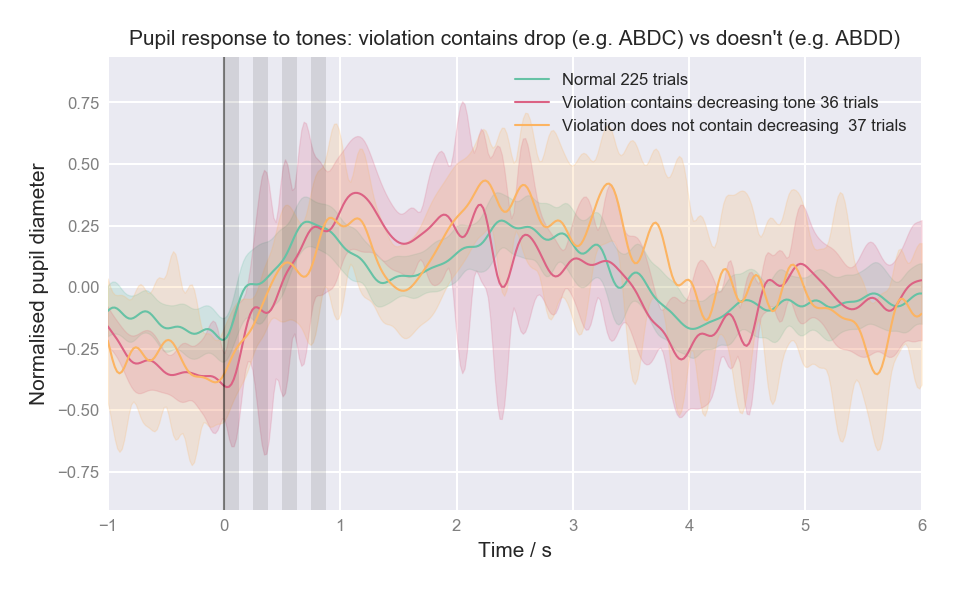

In [35]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: violation contains drop (e.g. ABDC) vs doesn't (e.g. ABDD)",
                      saveTitle = name+"_tonedecreasing",
                      dd={
                          'Normal':     {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation contains decreasing tone':  {'color':'#dc6284','conditions':[2,5,10,11,13,9],'range':('all'),'plotTrials':False},
                          'Violation does not contain decreasing ':  {'color':'#fcb462','conditions':[2,5,10,11,13,14],'range':('all'),'plotTrials':False}
                         },
                      testRange=[1.75,5],
                      tstart=-1,
                      tend=6
                     )


In [ ]:
t = np.linspace(0,1,50)
y0 = np.sin(2*np.pi*t)
y1 = np.sin(2*np.pi*t) + 0.5*np.exp(-(t-0.8)**2/(2*0.1**2))
y2 = np.sin(2*np.pi*t) + np.exp(-(t-0.8)**2/(2*0.1**2))
std = 0.125*np.ones(len(t))

p0 = funcZeroTest(y0-y0,np.sqrt(2)*std,ntests=1000)
p1 = funcZeroTest(y0-y1,np.sqrt(2)*std,ntests=1000)
p2 = funcZeroTest(y0-y2,np.sqrt(2)*std,ntests=1000)

fig, ax = plt.subplots(figsize = (1.5,1))
ax.plot(t,y0,label='p = %.5f'%p0)
ax.plot(t,y1,label='p = %.5f'%p1)
ax.plot(t,y2,label='p = %.5f'%p2)
ax.fill_between(t,y0+1.96*std,y0-1.96*std,color='C0',alpha=0.2)
ax.fill_between(t,y1+1.96*std,y1-1.96*std,color='C1',alpha=0.2)
ax.fill_between(t,y2+1.96*std,y2-1.96*std,color='C2',alpha=0.2)
ax.set_title('A test for my test')
ax.legend()

plt.savefig("./figures/testtest.png",dpi=400)